In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import mglearn
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False
from sklearn.model_selection import train_test_split

##  선형회귀 모델
- hypotheesis : y = w[0] * x[0] + w[1] * x[1] + ....b

w[0]: 0.393906  b: -0.031804


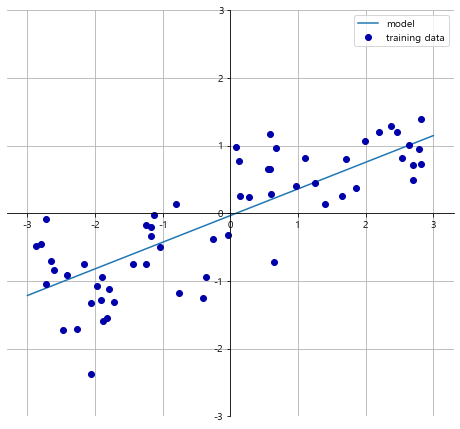

In [2]:
mglearn.plots.plot_linear_regression_wave()

In [2]:
X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                   test_size = .25) # random_state=0 : 난수 고정


In [5]:
X_train.shape

(45, 1)

In [3]:
from sklearn.linear_model import LinearRegression

In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [6]:
print("훈련 점수 :", lr.score(X_train, y_train))
print("테스트 점수 :", lr.score(X_test, y_test))

dir(lr)
print("기울기 : {}, 절편 : {}".format(lr.coef_, lr.intercept_))

훈련 점수 : 0.6700890315075756
테스트 점수 : 0.65933685968637
기울기 : [0.39390555], 절편 : -0.031804343026759746


In [7]:
# 주제 : 전기 생산량과 소비량
#  귀무가설 : 전기 생산량과 전기 소비량의 상관관계가 없다.
# 대립가설 : 전기 생산량과 전기 소비량의 상관관계가 없다.

# 월별 전기 사용량(백만kmh)
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]

# 월별 전기 생산금액(억원)
X = [3.52, 3.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]

# 생산량 4일때 소비량 예측?


In [3]:
from scipy import stats # 
result = stats.linregress(X, y)
result

NameError: name 'X' is not defined

In [9]:
slope, intercept, rv, pv, stderr = stats.linregress(X, y) # 차례로 변수에 저장
print(slope, intercept)

0.5797564574862252 0.5443331245421632


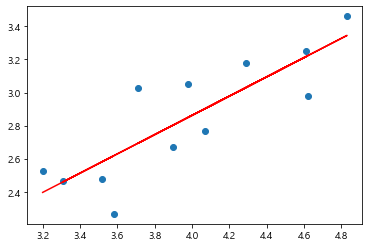

In [10]:
plt.scatter(X, y)  # 양의 상관관계임을 확인
plt.plot(np.array(X), slope*np.array(X) + intercept, c="red")

In [11]:
result = slope*4 + intercept
print("result : ", result)  # 통계함수 이용한 예측

result :  2.863358954487064


In [13]:
# 머신러닝 알고리즘 사용

lr = LinearRegression()
lr.fit(X, y) # 이렇게 하면 에러 발생. 이유는 입력값이 리스트여서 2차원 배열이여야 한다.

ValueError: Expected 2D array, got 1D array instead:
array=[3.52 3.58 3.31 4.07 4.62 3.98 4.29 4.83 3.71 4.61 3.9  3.2 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [14]:
num = np.array(X)       # 리스트를 배열로 만들기
num = num.reshape(-1,1) # 만든 배열을 2차원으로 만들기

lr2 = LinearRegression()
lr2.fit(num, y)
print(lr2.coef_, ", ",lr2.intercept_)


[0.57975646] ,  0.5443331245421632


In [ ]:
# 예측
lr.predict([[4]])

#### 고차원 측성에 대한 과적합

In [1]:
from mglearn.datasets import load_extended_boston, load_boston

X, y = load_extended_boston()
print(X.shape) # 특성

(506, 104)


In [6]:
# 훈령용과 테스트용으로 나누기

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,
                                                   test_size = .25) # random_state=0 : 난수 고정
lr = LinearRegression().fit(X_train, y_train)

print("훈련 점수 :", lr.score(X_train, y_train))
print("테스트 점수 :", lr.score(X_test, y_test))


훈련 점수 : 0.9520519609032727
테스트 점수 : 0.6074721959665845


In [17]:
# 선형회귀는 튜닝이 안되기에 튜닝 가능한 알고리즘 책 p184 튜닝가능 인자가 있다
# 릿지, 라쏘, 엘라스틱넷

###  릿지(Ridge) 회귀 모델

- L2 규제(Regularization)
- MSE 항에 penalty 항을 추가
- 알파를 크게하면 패널티 효과가 커지고(가중치 감소), 작게하면 그 반대가 됨
- 모델을 단순하게 해주고 훈련셋에 대한 성능 차이를 절충하는 효과

In [18]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train) # alpha =1.0 : 기본값
print("훈련 점수 :", ridge.score(X_train, y_train))
print("테스트 점수 :", ridge.score(X_test, y_test))
# 훈련 점수와 테스트 점수 차이가 줄어든 것을 확인 할 수 있음

훈련 점수 : 0.8857966585170941
테스트 점수 : 0.7527683481744757


In [19]:
# alpha = 10
ridge10 = Ridge(alpha = 10).fit(X_train, y_train) # alpha =1.0
print("훈련 점수 :", ridge10.score(X_train, y_train))
print("테스트 점수 :", ridge10.score(X_test, y_test))
# 차이값이 많이 줄어둠 일반화에 가깝다, 복잡도가 낮아진다

훈련 점수 : 0.7882787115369616
테스트 점수 : 0.6359411489177311


In [20]:
# alpha = 0.1
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train) # alpha =1.0
print("훈련 점수 :", ridge10.score(X_train, y_train))
print("테스트 점수 :", ridge10.score(X_test, y_test))

훈련 점수 : 0.7882787115369616
테스트 점수 : 0.6359411489177311


<function matplotlib.pyplot.legend(*args, **kwargs)>

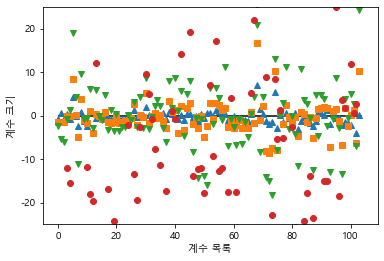

In [21]:
plt.plot(ridge10.coef_, "^", label="Ridge alpha = 10")
plt.plot(ridge.coef_, "s", label="Ridge alpha = 1")
plt.plot(ridge01.coef_, "v", label="Ridge alpha = 0.1")
plt.plot(lr.coef_, "o", label="Linear Regression")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0,0, len(lr.coef_))
plt.ylim(-25,25)
plt.legend

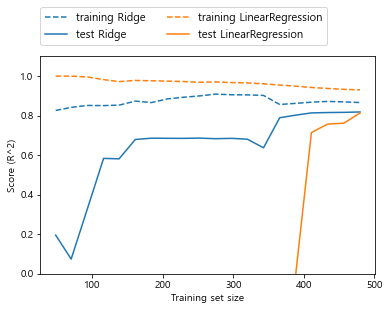

In [22]:
# alpha값 1로 고정, 데이터 크기만 조절
mglearn.plots.plot_ridge_n_samples()

###  라쏘(Lasso) 회귀 모델

- L1 규제 사용
- 알파를 크게하면 패널티의 효과가 커지고 작게하면 그 반대가 된다.
- 특성 선택이 자동으로 이루어진다.

In [23]:
from sklearn.linear_model import Lasso

In [24]:
lasso = Lasso().fit(X_train, y_train) # 기본 alpha = 1.0
print("훈련 점수 :", lasso.score(X_train, y_train))
print("테스트 점수 :", lasso.score(X_test, y_test))
print("사용한 특서의 수 :", np.sum(lasso.coef_!=0)) # 104개 중 4개만 사용

훈련 점수 : 0.29323768991114596
테스트 점수 : 0.20937503255272272
사용한 특서의 수 : 4


In [25]:
lasso001 = Lasso(alpha=0.01, max_iter = 100000).fit(X_train, y_train) # 기본 alpha = 1.0
print("훈련 점수 :", lasso001.score(X_train, y_train))
print("테스트 점수 :", lasso001.score(X_test, y_test))
print("사용한 특서의 수 :", np.sum(lasso001.coef_!=0)) 
# 특성이 많이 사용되고 알파 1일때 보다 약해짐. 성능 높아짐
# max_iter = 100000 ::반복

훈련 점수 : 0.8962226511086497
테스트 점수 : 0.7656571174549981
사용한 특서의 수 : 33


In [26]:
lasso00001 = Lasso(alpha=0.0001, max_iter = 100000).fit(X_train, y_train) # 기본 alpha = 1.0
print("훈련 점수 :", lasso00001.score(X_train, y_train))
print("테스트 점수 :", lasso00001.score(X_test, y_test))
print("사용한 특서의 수 :", np.sum(lasso00001.coef_!=0)) 

훈련 점수 : 0.9507158754515462
테스트 점수 : 0.6437467421273534
사용한 특서의 수 : 96


####  ElasticNet

- Ridge + Lasso

#### Boston Sample을 이용한 다중 선형 회귀

In [3]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.data.shape)
print(boston.feature_names)
print(boston.target)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 

In [4]:
model_boston = LinearRegression().fit(boston.data, boston.target)

In [5]:
print(model_boston.coef_) # 13개의 가중치

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [6]:
# 예측
pred = model_boston.predict(boston.data)

Text(0.5, 1.0, '실제와 예측값의 관계 확인')

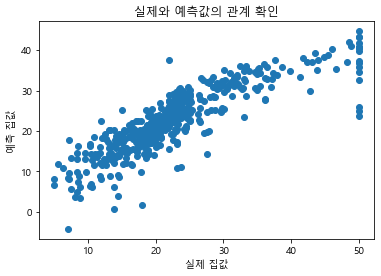

In [7]:
# 산포도 그래프
plt.scatter(boston.target, pred) # 실제 집값과 예측값 비교 x축이 집값, y축이 예측값
plt.xlabel("실제 집값")
plt.ylabel("예측 집값")
plt.title("실제와 예측값의 관계 확인")

In [8]:
# 탐색적 데이터 분석
df = pd.DataFrame(boston.data, columns=[boston.feature_names])
df.head(10) 

# 종속 변수 추가
df["MEDV"] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CBCE733850>,
      dtype=object)

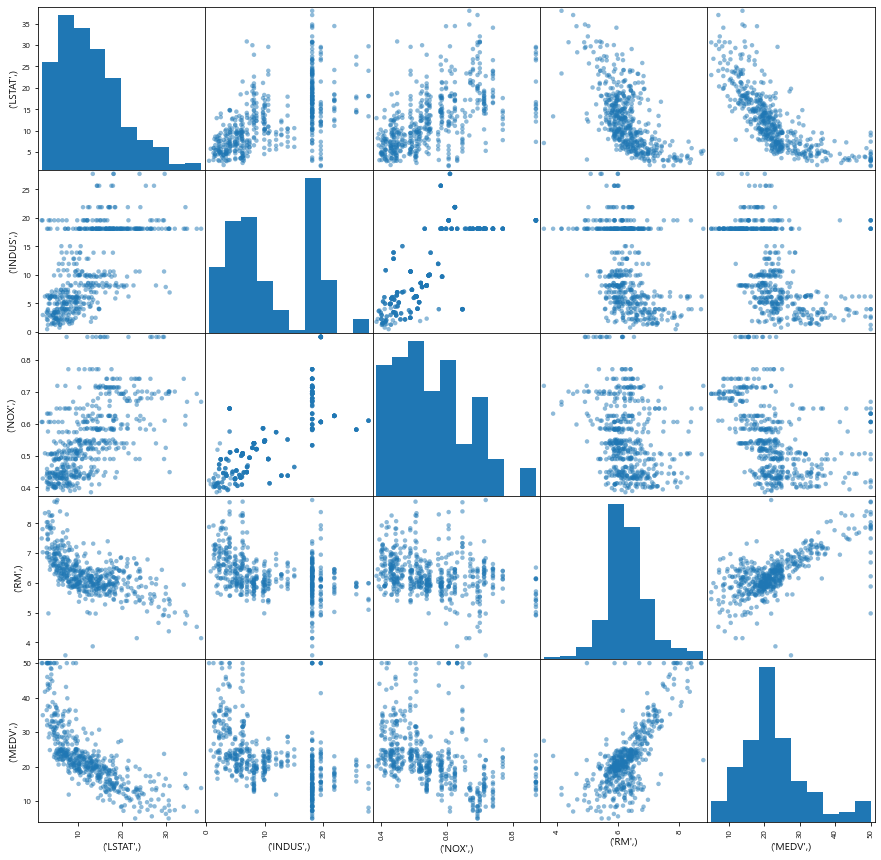

In [15]:
# RM, IMDUS, NOX, LASTAT

# seaborn의 pairplot
#cols = ["LSTAT","INDUS", "NOX","RM", "MEDV"]
#sns.pairplot(df[cols], size = 2.5)

# 판다스 활용하여 pairplot 그리기
pd.plotting.scatter_matrix(df[cols], figsize = (15,15), marker= "o",s=20)

In [ ]:
# 히트맵으로 보기
cc = np.corrcoef(df[cols].values.T)
cc
sns.heatmap(cc, yticklabels=cols, xticklabels=cols, annot=True,square=True, annot_kws={"size":15})

In [36]:
# 방이 5개일 때 집값은 얼마인가?

X = df[["RM"]].values
y = df[["MEDV"]].values

lr = LinearRegression().fit(X,y)
print(lr.coef_, lr.intercept_)

house_price = lr.predict([[5]])

print("방이 [%d]인 주택의 가격은 [%.f]달러입니다."%(5, house_price*1000))

[[9.10210898]] [-34.67062078]
방이 [5]인 주택의 가격은 [10840]달러입니다.


## 로지스틱 선형 회귀
+ L2 norm 규제를 사용
+ C 파라미터 사용(alpha와 같은 기능) 규제 강도를 설정


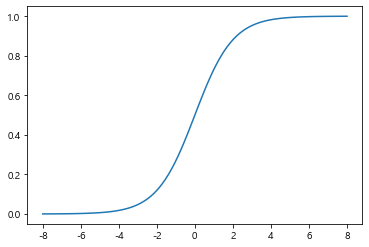

In [21]:
# sigmoid 함수 그래프 그리기

def sigmoid(x):
    result = []
    for i in x:
        result.append( 1/(1+np.exp(-i)))
    return result

x = np.linspace(-8,8, 100)
sig = sigmoid(x)
plt.plot(x, sig)


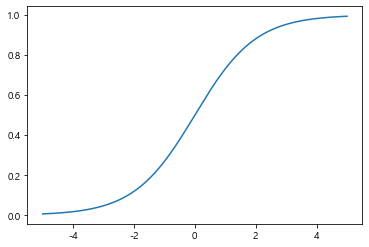

In [19]:
x = np.linspace(-5,5, 1000)
plt.plot(x, 1/(1+np.exp(-x)))

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


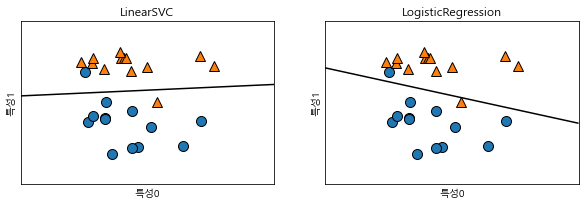

In [12]:
X, y = mglearn.datasets.make_forge() # X : 입력 데이터, y : 정답
# 시각화
_, axes = plt.subplots(1,2, figsize = (10,3))


# LogisticRegression와 LinearSVC 비교
for model, ax in zip([LinearSVC(C=1), LogisticRegression(C=1)], axes): # C=1 alpha와 같은 기능, 모델 복잡도 조절
    clf = model.fit(X, y)
    
    mglearn.plots.plot_2d_separator(clf, X, ax=ax)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax) # 데이터 표십
# 같은 데이터를 서로 다르게 경계선을 그래는 것을 확인 가능  
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성1")
# 주제가 강해지면 복잡도는 낮아진다.
# L2 norm으로 규제
# 

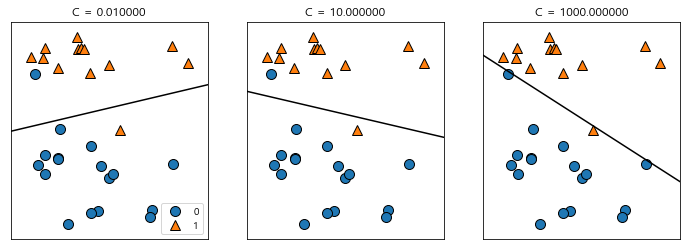

In [13]:
# C 값에 따라 주제가 변형하는지 그래프가 있음 mglearn
mglearn.plots.plot_linear_svc_regularization()
# C값이 낮아지면 규제가 강해지고 일반화에 가까워진다. C값이 높아지면 규제는 약해지고
# 
# 

#### C값에 따른 결과

In [17]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

# 훈련데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=42) # random_state=0 : 난수 고정

In [21]:
# C=1일 때
logreg = LogisticRegression(C=1, penalty="l2", max_iter=100000).fit(X_train, y_train)  

print("훈련 점수 :", logreg.score(X_train, y_train))
print("테스트 점수 :", logreg.score(X_test, y_test))


훈련 점수 : 0.960093896713615
테스트 점수 : 0.972027972027972


In [22]:
#  C=100일 때
logreg100 = LogisticRegression(C=100, penalty="l2", max_iter=100000).fit(X_train, y_train)  
# C=1, penalty="l2" 기본값,  max_iter=10000 반복횟수
print("훈련 점수 :", logreg100.score(X_train, y_train))
print("테스트 점수 :", logreg100.score(X_test, y_test))
# 

훈련 점수 : 0.9788732394366197
테스트 점수 : 0.965034965034965


In [24]:
#  C=0.01일 때
logreg001 = LogisticRegression(C=0.01, penalty="l2", max_iter=100000).fit(X_train, y_train)  

print("훈련 점수 :", logreg001.score(X_train, y_train))
print("테스트 점수 :", logreg001.score(X_test, y_test))

훈련 점수 : 0.9460093896713615
테스트 점수 : 0.972027972027972


In [28]:
# panelty = l1, C=1일 때
logreg_l1 = LogisticRegression(C=1, penalty="l1", solver="liblinear",
                               max_iter=100000).fit(X_train, y_train)  

print("훈련 점수 :", logreg_l1.score(X_train, y_train))
print("테스트 점수 :", logreg_l1.score(X_test, y_test))

훈련 점수 : 0.960093896713615
테스트 점수 : 0.958041958041958


In [29]:
# panelty = l1, C=100일 때
logreg100_l1 = LogisticRegression(C=100, penalty="l1", solver="liblinear",
                               max_iter=100000).fit(X_train, y_train)  

print("훈련 점수 :", logreg100_l1.score(X_train, y_train))
print("테스트 점수 :", logreg100_l1.score(X_test, y_test))

훈련 점수 : 0.9882629107981221
테스트 점수 : 0.972027972027972


In [30]:
# panelty = l1, C=0.01일 때
logreg001_l1 = LogisticRegression(C=0.01, penalty="l1", solver="liblinear",
                               max_iter=100000).fit(X_train, y_train)  

print("훈련 점수 :", logreg001_l1.score(X_train, y_train))
print("테스트 점수 :", logreg001_l1.score(X_test, y_test))

훈련 점수 : 0.9107981220657277
테스트 점수 : 0.951048951048951


### 성능 테스트(KNN, LogisticRegression, LinearSVC)



In [37]:
#유방암 데이터 사용, 살펴보기
dir(cancer)
cancer.data.shape # 데이터 개수 확인
cancer.feature_names
cancer.target_names # 음성, 양성
np.bincount(cancer.target) # 음성, 양성 개수
# cancer.target[cancer.target==0].shape


(212,)

In [83]:
# LogisticREgression


X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, random_state=0)
model = LogisticRegression(max_iter=100000).fit(X_train, y_train)
scores = model.score(X_test,y_test)
print("score :", scores) #     

score : 0.951048951048951


In [84]:
# LinearSVC

scores = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target)
    model = LinearSVC(max_iter=10000).fit(X_train, y_train)
    scores.append(model.score(X_test,y_test))
    

C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

In [85]:
print("score :", scores) 
print("평균 :",np.mean(np.array(scores)))

score : [0.9370629370629371, 0.951048951048951, 0.951048951048951, 0.958041958041958, 0.9230769230769231, 0.9440559440559441, 0.8951048951048951, 0.9230769230769231, 0.8951048951048951, 0.8531468531468531]
평균 : 0.9230769230769231


In [86]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
                                                                                                           
model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
scores = model.score(X_test,y_test)
print("score :", scores) 

score : 0.9370629370629371


([<matplotlib.axis.XTick at 0x2291ffbe8e0>,
 [Text(0, 0, 'mean radius'),
  Text(0, 0, 'mean texture'),
  Text(0, 0, 'mean perimeter'),
  Text(0, 0, 'mean area'),
  Text(0, 0, 'mean smoothness'),
  Text(0, 0, 'mean compactness'),
  Text(0, 0, 'mean concavity'),
  Text(0, 0, 'mean concave points'),
  Text(0, 0, 'mean symmetry'),
  Text(0, 0, 'mean fractal dimension'),
  Text(0, 0, 'radius error'),
  Text(0, 0, 'texture error'),
  Text(0, 0, 'perimeter error'),
  Text(0, 0, 'area error'),
  Text(0, 0, 'smoothness error'),
  Text(0, 0, 'compactness error'),
  Text(0, 0, 'concavity error'),
  Text(0, 0, 'concave points error'),
  Text(0, 0, 'symmetry error'),
  Text(0, 0, 'fractal dimension error'),
  Text(0, 0, 'worst radius'),
  Text(0, 0, 'worst texture'),
  Text(0, 0, 'worst perimeter'),
  Text(0, 0, 'worst area'),
  Text(0, 0, 'worst smoothness'),
  Text(0, 0, 'worst compactness'),
  Text(0, 0, 'worst concavity'),
  Text(0, 0, 'worst concave points'),
  Text(0, 0, 'worst symmetry'),
  

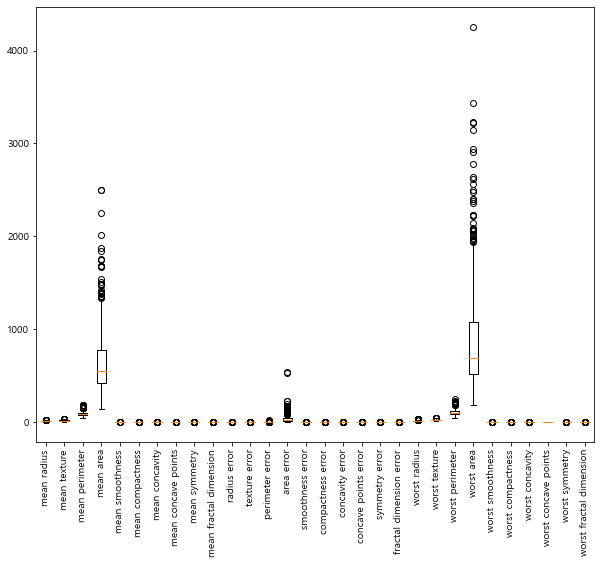

In [87]:
# 이상치 검출을 위한 boxplot

plt.figure(figsize=(10,8))
plt.boxplot(cancer.data)
plt.xticks(np.arange(30) + 1, cancer.feature_names, rotation=90)

In [88]:
# standardization 표준화 시키기

#  속성별 평균
m = cancer.data.mean(axis=0)

#속성별 표준 편차
s = cancer.data.std(axis=0)

data1 = (cancer.data - m) / s


([<matplotlib.axis.XTick at 0x22920f3c940>,
 [Text(0, 0, 'mean radius'),
  Text(0, 0, 'mean texture'),
  Text(0, 0, 'mean perimeter'),
  Text(0, 0, 'mean area'),
  Text(0, 0, 'mean smoothness'),
  Text(0, 0, 'mean compactness'),
  Text(0, 0, 'mean concavity'),
  Text(0, 0, 'mean concave points'),
  Text(0, 0, 'mean symmetry'),
  Text(0, 0, 'mean fractal dimension'),
  Text(0, 0, 'radius error'),
  Text(0, 0, 'texture error'),
  Text(0, 0, 'perimeter error'),
  Text(0, 0, 'area error'),
  Text(0, 0, 'smoothness error'),
  Text(0, 0, 'compactness error'),
  Text(0, 0, 'concavity error'),
  Text(0, 0, 'concave points error'),
  Text(0, 0, 'symmetry error'),
  Text(0, 0, 'fractal dimension error'),
  Text(0, 0, 'worst radius'),
  Text(0, 0, 'worst texture'),
  Text(0, 0, 'worst perimeter'),
  Text(0, 0, 'worst area'),
  Text(0, 0, 'worst smoothness'),
  Text(0, 0, 'worst compactness'),
  Text(0, 0, 'worst concavity'),
  Text(0, 0, 'worst concave points'),
  Text(0, 0, 'worst symmetry'),
  

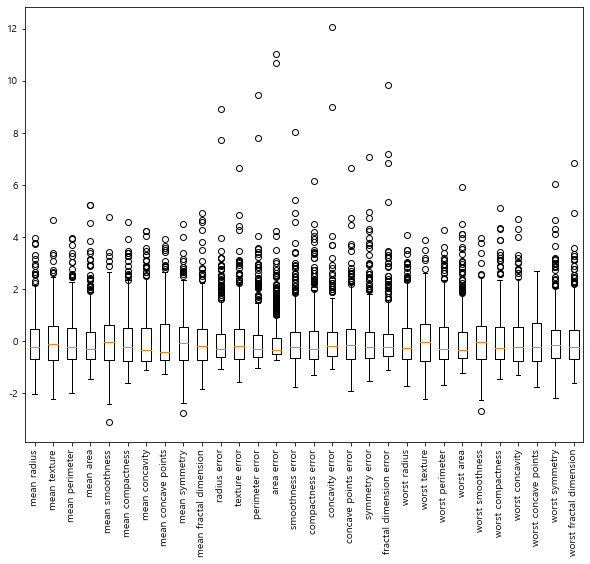

In [89]:
plt.figure(figsize=(10,8))
plt.boxplot(data1)
plt.xticks(np.arange(30) + 1, cancer.feature_names, rotation=90)

In [90]:
# 데이터 전처리 후 LinearSVC

scores = []

X_train, X_test, y_train, y_test = train_test_split(data1, cancer.target,random_state=0)

for i in range(10):                                                                                                       
    model = LinearSVC(max_iter=10000).fit(X_train, y_train)
    scores.append(model.score(X_test,y_test))
print("score :", scores) 
print("평균 :",np.mean(np.array(scores)))

score : [0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441]
평균 : 0.944055944055944


In [91]:
# 데이터 전처리 후 KNN
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(data1, cancer.target, random_state=0)
                                                                                                           
model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
scores = model.score(X_train,y_train)
print("score :", scores) 

score : 0.9741784037558685


In [92]:
# LogisticREgression
# C값 조정
X_train, X_test, y_train, y_test = train_test_split(data1, 
                                                    cancer.target, random_state=0)
model = LogisticRegression(C=1,max_iter=10000).fit(X_train, y_train)
scores = model.score(X_train,y_train)
print("score :", scores)    

score : 0.9906103286384976


In [81]:
# 데이터 전처리 후 LinearSVC, C값 조정

scores = []

X_train, X_test, y_train, y_test = train_test_split(data1, cancer.target,random_state=0)

for i in range(10):                                                                                                       
    model = LinearSVC(C=0.01,max_iter=10000).fit(X_train, y_train)
    scores.append(model.score(X_test,y_test))
print("score :", scores) 
print("평균 :",np.mean(np.array(scores)))

score : [0.972027972027972, 0.972027972027972, 0.972027972027972, 0.972027972027972, 0.972027972027972, 0.972027972027972, 0.972027972027972, 0.972027972027972, 0.972027972027972, 0.972027972027972]
평균 : 0.972027972027972


## 다중 클래스 분류

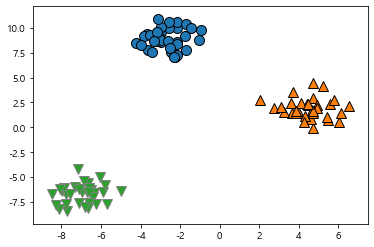

In [102]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1],y)

In [103]:
# 트레이닝
linear_svc = LinearSVC().fit(X, y)
print(linear_svc.coef_)
print(linear_svc.intercept_)

[[-0.17492562  0.23141224]
 [ 0.4762138  -0.0693739 ]
 [-0.18914514 -0.20399713]]
[-1.07745244  0.13140193 -0.08604887]


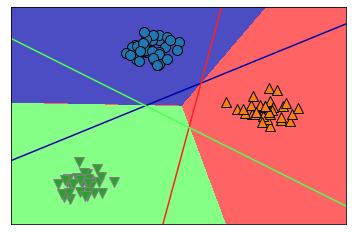

In [105]:
# 경계선 그리기
mglearn.plots.plot_2d_classification(linear_svc, X, fill=True, alpha=.7) # 색으로 구분
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15) 

for coef, intercept, color in zip(linear_svc.coef_, linear_svc.intercept_,
                                 mglearn.cm3.colors):
    plt.plot(line,-(line*coef[0] + intercept) / coef[1], c=color)

#### 적합도 정검 
+ p131
- Accuracy : 정확도(모든 데이터들 중에서)
    + (TN + TP) / (TN + FP + FN + TP) ==== 전체 / 정답 개수
    
- Precision :  정확도(예측한 양성인 것들 중에서 실제값이 양성과 같은 데이터의 비율, 책 134)
    + TP / (FP + TP)
    
    
- Recall : 재현율(실제값이 양성인 것들 중에서 예측과 실제값이 양성으로 일치한 비율)
    + TP / (FN + TP)
    
    
- F1 Score, p136
    - 조화 평균

- ROC 

In [ ]:
#    양    음
# 음 TN    FP
#-------------
# 양 FN    TP

In [4]:
# 실습 

arr =  [[5, 0, 0, 0],
       [0, 10, 0, 0],
       [0, 0, 15, 0],
       [0, 0, 0, 5]]
df_cm = pd.DataFrame(arr, index = [i for i in "ABCD"], columns = [i for i in "ABCD"])
df_cm

,A,B,C,D
A,5,0,0,0
B,0,10,0,0
C,0,0,15,0
D,0,0,0,5


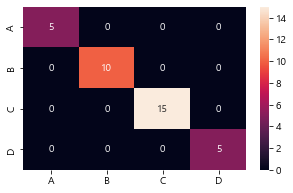

In [5]:
# 히트맵

plt.figure(figsize = (5,3))
sns.heatmap(df_cm, annot = True)

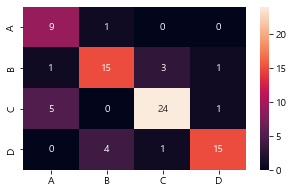

In [7]:
arr =  [[9, 1, 0, 0],
       [1, 15, 3, 1],
       [5, 0, 24, 1],
       [0, 4, 1, 15]]
df_cm = pd.DataFrame(arr, index = [i for i in "ABCD"], columns = [i for i in "ABCD"])

# 히트맵
plt.figure(figsize = (5,3))
sns.heatmap(df_cm, annot = True)



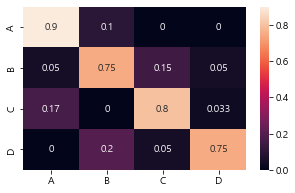

In [10]:
# 정규화로 무엇을 더 잘 맞췄는지 확인

total = np.sum(arr, axis=1)
total
arr = arr / total[:,None]
arr
df_cm = pd.DataFrame(arr, index = [i for i in "ABCD"], columns = [i for i in "ABCD"])

# 히트맵
plt.figure(figsize = (5,3))
sns.heatmap(df_cm, annot = True)

In [11]:
from sklearn.metrics import confusion_matrix


In [15]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

confusion_matrix(y_true, y_pred)
# 0,1,2 컬럼, 인덱스 

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [2]:
# 오차표 자동 기능
from sklearn.metrics import classfication_report

y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]

print(classfication_report(y_true, y_pred, target_names=["class 0", "class 1"]))

ImportError: cannot import name 'classfication_report' from 'sklearn.metrics' (C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

#### ROC corve(with AUC)
- p141
- 이진 분류에서 사용

In [3]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [6]:
X, y = make_classification(n_samples=1000, n_features=2,
                    n_informative=2, n_redundant=0, 
                    random_state=0)

X[:10, :]
y[:10]

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [8]:
# 트레이닝

model = LogisticRegression().fit(X, y)

In [11]:
# 일 시키기, 기존 훈련데이터로 예측해보기
y_hat = model.predict(X)
print(y_hat[:40])
print(y[:40])

[0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1
 0 0 1]
[0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1
 0 0 1]


In [13]:
# 얼마나 정답값을 잘 예측했는지 확인
confusion_matrix(y, y_hat)

array([[477,  20],
       [ 28, 475]], dtype=int64)

In [14]:
# 레포트 출력
print(classification_report(y, y_hat, target_names=["class0", "class1"]))

              precision    recall  f1-score   support

      class0       0.94      0.96      0.95       497
      class1       0.96      0.94      0.95       503

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



In [15]:
# ROC그래프로 시각화, 2중분류에서만 가능 다중분류에서 사용 못함
from sklearn.metrics import roc_curve



Text(0, 0.5, 'True Positive Rate(Recall)')

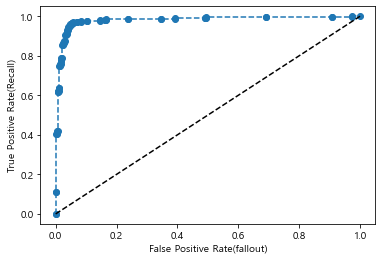

In [17]:
fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))
plt.plot(fpr, tpr, "o--", label="Logistic Regression")

plt.plot([0,1], [0,1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate(fallout)")
plt.ylabel("True Positive Rate(Recall)")

In [19]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, model.decision_function(X))
# 면적이 97.9%

0.9795592641335089

### 사례1 : 타이타닉 예제
- 성능을 제대로 측정했는지에 대한 관점

In [32]:
df = pd.read_csv("../Acorn machine learning/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
# 전처리 필요없는 숫자로 된 컬럼 모아놓기
cols_to_keep = ["Survived", "Age", "Fare"]

# 원 핫 인코딩
# Pclass를 순서가 없는 더미변수화(one ht encoding)로 변환
dummy_class = pd.get_dummies(df["Pclass"], prefix="Pclass")
dummy_class.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [34]:
# Sex의 더미변수화, 0과 1로 표시
dummy_sex = pd.get_dummies(df["Sex"], prefix="Sex")
dummy_sex.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [35]:
# 데이터 함치기

df1 = df[cols_to_keep].join(dummy_class.loc[:, "Pclass1":])
df1.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,7.2500,0,0,1
1,1,38.0,71.2833,1,0,0
2,1,26.0,7.9250,0,0,1
3,1,35.0,53.1000,1,0,0
4,0,35.0,8.0500,0,0,1


In [36]:
# 
df1 = df1.join(dummy_sex.loc[:, "Sex_male"])
df1.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male
0,0,22.0,7.2500,0,0,1,1
1,1,38.0,71.2833,1,0,0,0
2,1,26.0,7.9250,0,0,1,0
3,1,35.0,53.1000,1,0,0,0
4,0,35.0,8.0500,0,0,1,1


In [55]:
# Survived가 y로 정답이고 나머지가 X로 트레이닝 시켜야 할 값이다
# Survived를 제외한 나머지 컬럼(특성) 추출

train_cols = df1.columns[1:]
train_cols

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_male'], dtype='object')

In [56]:
# 결측치 확인
# np.isnan(df1[train_cols])
df1.isnull().sum() # 다른 방법

# 결측치 처리
# 삭제 or 대체
# 결측치 삭제 
# df1[train_cols] = df1[train_cols].dropna(axis=0)
# df1["Survived"] = df1["Survived"].dropna(axis=0)
# 
# 대체
df1[train_cols] = df1[train_cols].fillna(0)
df1["Survived"] = df1["Survived"].fillna(0)


In [57]:
import statsmodels.api as sm

In [61]:
# 통계정보를 확인하기 위한 로지스틱 획귀
model2 = sm.Logit(df1["Survived"], df1[train_cols]).fit()
model2.summary2()

Optimization terminated successfully.
         Current function value: 0.458488
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.311     
Dependent Variable: Survived         AIC:              829.0250  
Date:               2021-01-12 12:28 BIC:              857.7791  
No. Observations:   891              Log-Likelihood:   -408.51   
Df Model:           5                LL-Null:          -593.33   
Df Residuals:       885              LLR p-value:      1.0371e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Age          -0.0159    0.0053   -2.9843  0.0028  -0.0264  -0.0055
Fare          0.0015    0.0021    0.7370  0.4611  -0.0026   0.0056
Pclass_1      2.6932    0.3372    7.9875  0.0000   2.0323   3.3540
Pclass_2      1.8519    0.2670    6.9358  0.0000   1.3286   2.3752
Pclass_3      0.6215    0.1808    3.4377  0.0006   0.2672   0.9758
Sex_male     -2.6151    0.1860  -14.0594  0.0000  -2.9797  -2.2505
=================================================================

"""

In [62]:
# 트레이닝 시키기 
model2 = LogisticRegression().fit(df1[train_cols], df1["Survived"])

In [63]:
df1["predict"] = model2.predict(df1[train_cols])
# 예측값과 실제값이 같은지 확인

In [64]:
confusion_matrix(df1["Survived"], df1["predict"], labels=[1,0])

array([[242, 100],
       [ 93, 456]], dtype=int64)

In [65]:
# 정확도 확인
print("정확도 : ",model2.score(df1[train_cols], df1["Survived"]))
print("정확도 : ", (242 + 456)/(244 + 100 + 93 + 456))

정확도 :  0.7833894500561167
정확도 :  0.7816349384098544


In [69]:
print(classification_report(df1["Survived"], df1["predict"]))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       549
           1       0.72      0.71      0.71       342

    accuracy                           0.78       891
   macro avg       0.77      0.77      0.77       891
weighted avg       0.78      0.78      0.78       891



0.8414235345497928

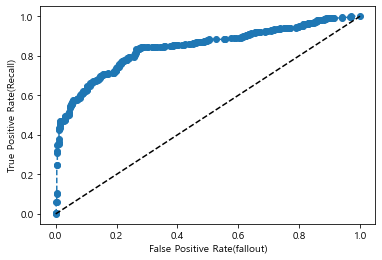

In [68]:
fpr, tpr, thresholds = roc_curve(df1["Survived"], model2.decision_function(df1[train_cols]))
                                     
plt.plot(fpr, tpr, "o--", label="Logistic Regression")
plt.plot([0,1], [0,1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate(fallout)")
plt.ylabel("True Positive Rate(Recall)")

roc_auc_score(df1["Survived"], model2.decision_function(df1[train_cols]))